In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def my_Kmeans(points,k,n):
    np.random.seed(0)
    belongs_to = np.random.randint(k, size=n) # each data belongs to which cluster  # random initializing
    Mean_cluster = np.random.rand(k,2)
    J_p = 0
    while True:
    
        for j in range(k):
            Mean_cluster[j,:] = np.mean(points[belongs_to==j,:],axis = 0)
    
        for j in range(n):
            distance = np.sum((points[j,:]-Mean_cluster)**2,axis = 1)
            indx =np.argmin(distance)
            belongs_to[j] = indx
        J = 0 #cost function
        for j in range(n):
            J = J +  np.sqrt( np.sum( (points[j,:] - Mean_cluster[belongs_to[j],:])**2 ) ) 
        if(np.abs(J_p-J)<1 ):
            break
        J_p = J
    
    return belongs_to ,Mean_cluster


In [3]:
# load the data
df = pd.read_excel (r'data(2).xlsx')
points = df.to_numpy()
points = points[:,1:3]

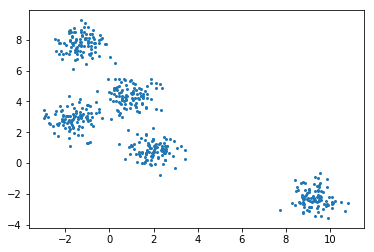

In [4]:
plt.figure()
plt.scatter(points[:,0],points[:,1],s=4 )

In [5]:
k = 5
n = len(points)
belongs_to , Mean_cluster = my_Kmeans(points,k,n)

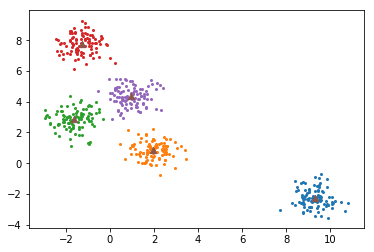

In [6]:
plt.figure()
for i in range(k):
    plt.scatter(points[belongs_to==i,0],points[belongs_to==i,1],s=4 )
plt.scatter(Mean_cluster[:,0],Mean_cluster[:,1],s=40 ,marker='^') 